<a href="https://colab.research.google.com/github/2100030074/TEXT-Summarization-/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# web scrape Wikipedia article on Natural Language Processing
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [ ]:
article_text

'Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nChallenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\nNatural language processing has its roots in the 1940s.[1] Already in 1940, Alan Turing published an article titled "Computing Mac

In [ ]:
article_text = re.sub(r'[^a-zA-Z0-9 ]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [ ]:
# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [ ]:
sentence_list = nltk.sent_tokenize(article_text)

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:

word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [ ]:

word_frequencies

{'Natural': 2,
 'language': 24,
 'processing': 12,
 'NLP': 15,
 'interdisciplinary': 3,
 'subfield': 1,
 'computer': 3,
 'science': 3,
 'linguistics': 9,
 'It': 2,
 'primarily': 1,
 'concerned': 1,
 'giving': 1,
 'computers': 1,
 'ability': 1,
 'support': 1,
 'manipulate': 1,
 'human': 1,
 'involves': 2,
 'natural': 14,
 'datasets': 1,
 'text': 2,
 'corpora': 2,
 'speech': 4,
 'using': 3,
 'either': 1,
 'rule': 5,
 'based': 9,
 'probabilistic': 1,
 'e': 9,
 'statistical': 8,
 'recently': 2,
 'neural': 6,
 'network': 3,
 'machine': 6,
 'learning': 6,
 'approaches': 6,
 'The': 6,
 'goal': 1,
 'capable': 1,
 'understanding': 4,
 'contents': 1,
 'documents': 3,
 'including': 1,
 'contextual': 1,
 'nuances': 1,
 'within': 1,
 'technology': 1,
 'accurately': 1,
 'extract': 1,
 'information': 1,
 'insights': 1,
 'contained': 1,
 'well': 2,
 'categorize': 1,
 'organize': 1,
 'Challenges': 1,
 'frequently': 2,
 'involve': 2,
 'recognition': 1,
 'generation': 2,
 'roots': 1,
 'Already': 1,
 'Ala

In [ ]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [ ]:

word_frequencies

{'Natural': 0.08333333333333333,
 'language': 1.0,
 'processing': 0.5,
 'NLP': 0.625,
 'interdisciplinary': 0.125,
 'subfield': 0.041666666666666664,
 'computer': 0.125,
 'science': 0.125,
 'linguistics': 0.375,
 'It': 0.08333333333333333,
 'primarily': 0.041666666666666664,
 'concerned': 0.041666666666666664,
 'giving': 0.041666666666666664,
 'computers': 0.041666666666666664,
 'ability': 0.041666666666666664,
 'support': 0.041666666666666664,
 'manipulate': 0.041666666666666664,
 'human': 0.041666666666666664,
 'involves': 0.08333333333333333,
 'natural': 0.5833333333333334,
 'datasets': 0.041666666666666664,
 'text': 0.08333333333333333,
 'corpora': 0.08333333333333333,
 'speech': 0.16666666666666666,
 'using': 0.125,
 'either': 0.041666666666666664,
 'rule': 0.20833333333333334,
 'based': 0.375,
 'probabilistic': 0.041666666666666664,
 'e': 0.375,
 'statistical': 0.3333333333333333,
 'recently': 0.08333333333333333,
 'neural': 0.25,
 'network': 0.125,
 'machine': 0.25,
 'learning':

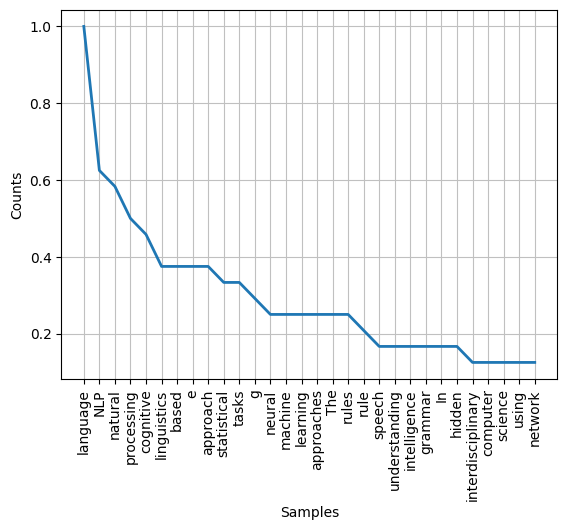

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

In [ ]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [ ]:

sentence_scores
print(2.25)

2.25


In [ ]:

summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [ ]:
summary
print('Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. Up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. The following is a list of some of the most commonly researched tasks in natural language processing. Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.')

Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. Up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. The following is a list of some of the most commonly researched tasks in natural language processing. Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.


Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. Up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. The following is a list of some of the most commonly researched tasks in natural language processing. Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.


